In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import cv2

二维扭曲和旋转 <p>
g(t<sub>1</sub>,t<sub>2</sub>) <-> G(f<sub>1</sub>,f<sub>2</sub>) <p>
g(t<sub>1</sub>-$\alpha$ t<sub>2</sub>,t<sub>2</sub>) <-> G(f<sub>1</sub>,f<sub>2</sub>+$\alpha$ f<sub>1</sub>) <p>
g(t<sub>1</sub>,t<sub>2</sub>-$\alpha$ t<sub>1</sub>) <-> G(f<sub>1</sub>+$\alpha$ f<sub>2</sub>,f<sub>2</sub>) 

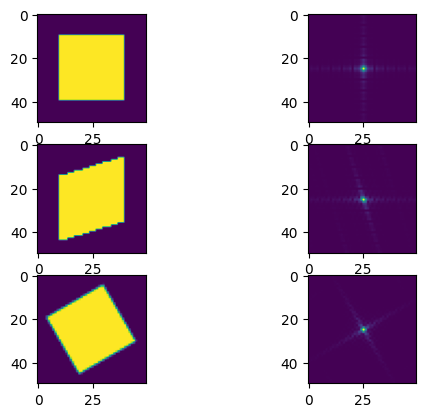

In [2]:
x_image = np.zeros([50,50])
x_image[10:40,10:40]=1
plt.figure(1)
plt.subplot(3,2,1)
plt.imshow(x_image)
x_fft = np.fft.fft2(x_image)
x_fshift = np.fft.fftshift(x_fft)
#plt.subplot(3,3,2)
#plt.imshow(np.abs(x_fft))
plt.subplot(3,2,2)
plt.imshow(np.abs(x_fshift))

alpha = 0.3
x_Twi = x_image.copy()
for i in range(x_image.shape[1]):
    column = x_image[:,i]
    twist = np.rint(alpha*(i-25))
    for j in range(column.shape[0]):
        x_Twi[j,i] = column[int(np.mod(j+twist,50))]
plt.subplot(3,2,3)
plt.imshow(x_Twi)
x_fft_Twi = np.fft.fft2(x_Twi )
x_fshift_Twi = np.fft.fftshift(x_fft_Twi)
plt.subplot(3,2,4)
plt.imshow(np.abs(x_fshift_Twi))


theta = 30
x_0,y_0 = 25,25
MAR = cv2.getRotationMatrix2D((x_0,y_0),theta,1.0)  #rotation matrix
x_rot = cv2.warpAffine(x_image, MAR, (50, 50))
plt.subplot(3,2,5)
plt.imshow(x_rot)
x_fft_rot = np.fft.fft2(x_rot)
x_fshift_rot = np.fft.fftshift(x_fft_rot)
plt.subplot(3,2,6)
plt.imshow(np.abs(x_fshift_rot))

傅里叶变换示例：rect($\frac{t}{T}$) <-> Tsinc(fT)

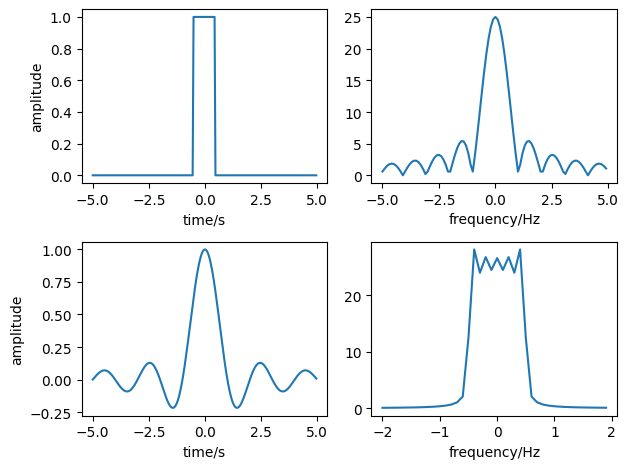

In [3]:

T=1
N=256
duration = 10*T
interval = duration/N
t_l = np.linspace(-duration/2,duration/2-interval,N)
x_t = np.zeros_like(t_l)
x_t[int(-(T/2)/interval+N/2):int((T/2)/interval+N/2)] = 1

plt.figure(2)
plt.subplot(2,2,1)
plt.plot(t_l,x_t)
plt.xlabel('time/s')
plt.ylabel('amplitude')

x_t_fft = np.fft.fft(x_t)
x_t_fshift = np.fft.fftshift(x_t_fft)
f_l = np.linspace(-0.5/interval,0.5/interval-1/interval/N,N)
fre = np.fft.fftfreq(len(t_l),interval)
plt.subplot(2,2,2)
plt.plot(f_l[int(N/2-50):int(N/2+50)],np.abs(x_t_fshift[int(N/2-50):int(N/2+50)]))
plt.xlabel('frequency/Hz')

x_sinc_t = np.sinc(t_l)
plt.subplot(2,2,3)
plt.plot(t_l,x_sinc_t)
plt.xlabel('time/s')
plt.ylabel('amplitude')
x_sinc_t_fft = np.fft.fft(x_sinc_t)
x_sinc_t_fshift = np.fft.fftshift(x_sinc_t_fft)
plt.subplot(2,2,4)
plt.plot(f_l[int(N/2-20):int(N/2+20)],np.abs(x_sinc_t_fshift[int(N/2-20):int(N/2+20)]))
plt.xlabel('frequency/Hz')

plt.tight_layout()

插值核

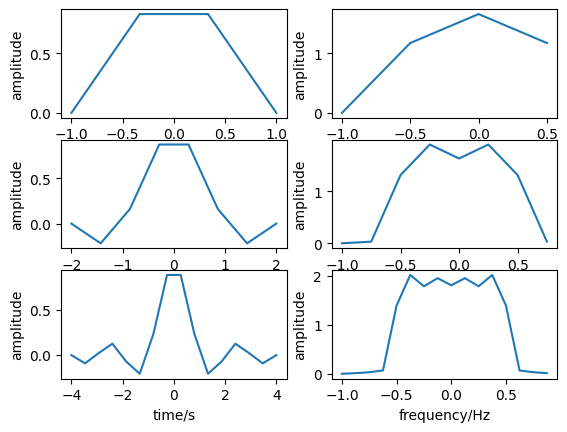

In [ ]:
interval = 0.5
duaration = np.array([2,4,8])
plt.figure()
for i in range(len(duaration)):
    t = np.linspace(-duaration[i]/2,duaration[i]/2,int(duaration[i]/interval))
    f = np.linspace(-0.5/interval,0.5/interval-1/interval/int(duaration[i]/interval),int(duaration[i]/interval))
    x_sinc_t = np.sinc(t)
    x_sinc_t_fft = np.fft.fft(x_sinc_t)
    x_sinc_t_fshift = np.fft.fftshift(x_sinc_t_fft)
    plt.subplot(3,2,2*i+1)
    plt.plot(t,x_sinc_t)
    plt.xlabel('time/s')
    plt.ylabel('amplitude')
    plt.subplot(3,2,2*i+2)
    plt.plot(f,np.abs(x_sinc_t_fshift))
    plt.xlabel('frequency/Hz')
    plt.ylabel('amplitude')



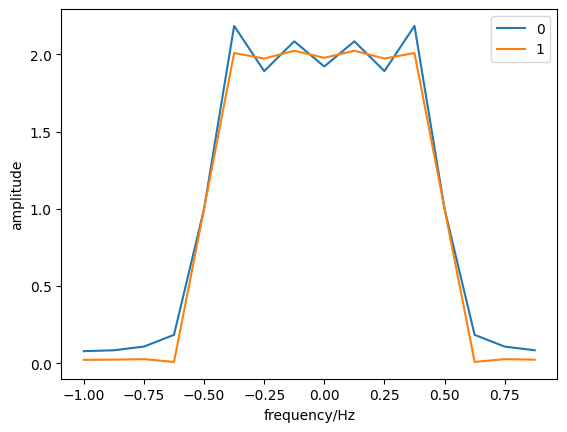

In [23]:
plt.figure()  
t = np.linspace(-duaration[2]/2,duaration[2]/2-interval,int(duaration[2]/interval))
f = np.linspace(-0.5/interval,0.5/interval-1/interval/int(duaration[2]/interval),int(duaration[2]/interval))
x_sinc_t = np.sinc(t)
x_sinc_t_fft = np.fft.fft(x_sinc_t)
x_sinc_t_fshift = np.fft.fftshift(x_sinc_t_fft)

x_ks_t = x_sinc_t*ss.get_window(window=('kaiser',2.5),Nx=16)
x_ks_t_fft = np.fft.fft(x_ks_t)
x_ks_t_fshift = np.fft.fftshift(x_ks_t_fft)

# plt.plot(t,ss.get_window(window=('kaiser',2.5),Nx=16))
plt.plot(f,np.abs(x_sinc_t_fshift),label = '0')
plt.plot(f,np.abs(x_ks_t_fshift),label = '1')
plt.xlabel('frequency/Hz')
plt.ylabel('amplitude')
plt.legend()